__Hello World Project__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_csv('Parking.csv')
time=data.groupby(['Violation Time'])['Summons Number'].count()

time1=time.to_frame(name='count')
time1.sort_values(by=['count'], ascending=False)

,count
Violation Time,
1136A,139
0906A,128
0836A,126
0936A,125
0945A,124
1140A,122
1106A,117
1146A,116
1137A,115


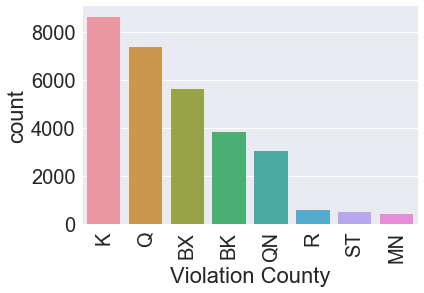

In [14]:
#PARKING DATA
data=pd.read_csv('Parking.csv')
%matplotlib inline

dfb1=pd.DataFrame(data,columns=['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'])

#Remove Ny from Data frame
dfb1=dfb1[dfb1['Violation County'] != 'NY']

#Plot
g=sns.countplot(x='Violation County', data=dfb1,order=dfb1['Violation County'].value_counts().iloc[:10].index)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

Import New York Crime data between 2015-2017

In [5]:
data_NY = pd.read_csv('NY_2015-2017.csv', low_memory=False)
print(data_NY.columns)

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')


In [147]:
df_NY=pd.DataFrame(data_NY, columns=['CMPLNT_FR_DT', 'PD_DESC', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC'])
df_NY['CMPLNT_FR_DT']=pd.to_datetime(df_NY['CMPLNT_FR_DT'])

The distribution of crimes

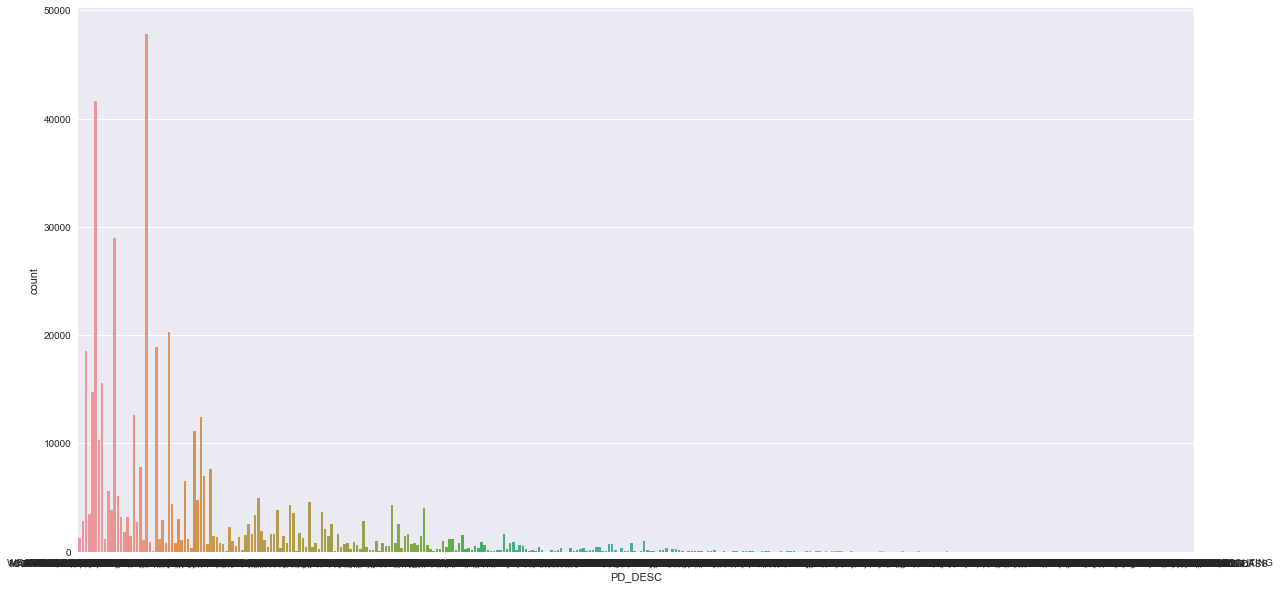

In [96]:
fig = plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="PD_DESC", data=df_NY)

__Organize the data__

1- By year

       count unique                        top   freq
YEAR                                                 
2015     821     94  FRAUD,UNCLASSIFIED-FELONY    129
2016    8365    187      HARASSMENT,SUBD 3,4,5    701
2017  457768    345      HARASSMENT,SUBD 3,4,5  47042


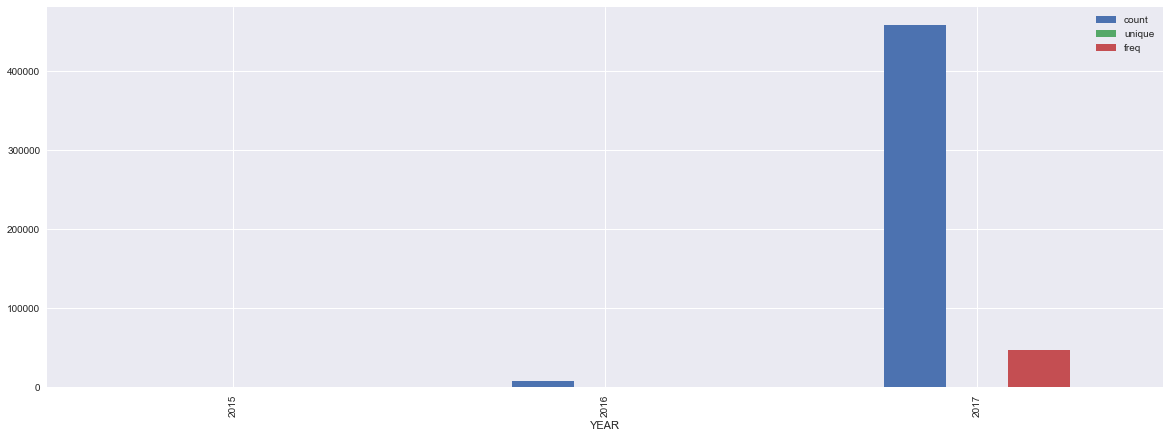

In [145]:
#By Year
df_NY['YEAR']=df_NY['CMPLNT_FR_DT'].dt.year
crime_yr=df_NY.groupby(['YEAR'])['PD_DESC'].describe()
print(crime_yr)
crime_yr.plot.bar(figsize=(20,7))

2- By Month

In [24]:
df_NY['MONTH']=df_NY['CMPLNT_FR_DT'].dt.month
crime_month=df_NY.groupby(['MONTH'])['PD_DESC'].size()
print(crime_month)

MONTH
1     38559
2     33084
3     36363
4     37740
5     40652
6     40380
7     41907
8     41773
9     40305
10    41849
11    37613
12    37009
Name: PD_DESC, dtype: int64


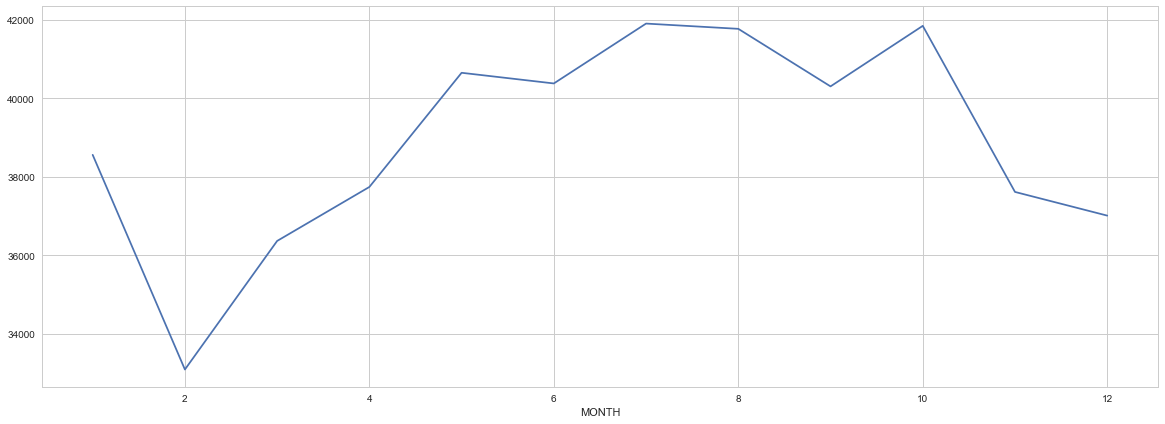

In [29]:
#the plot of the crime by month
fig, ax = plt.subplots(figsize=(20,7)) #change the size of the plot
crime_month.plot(ax=ax)

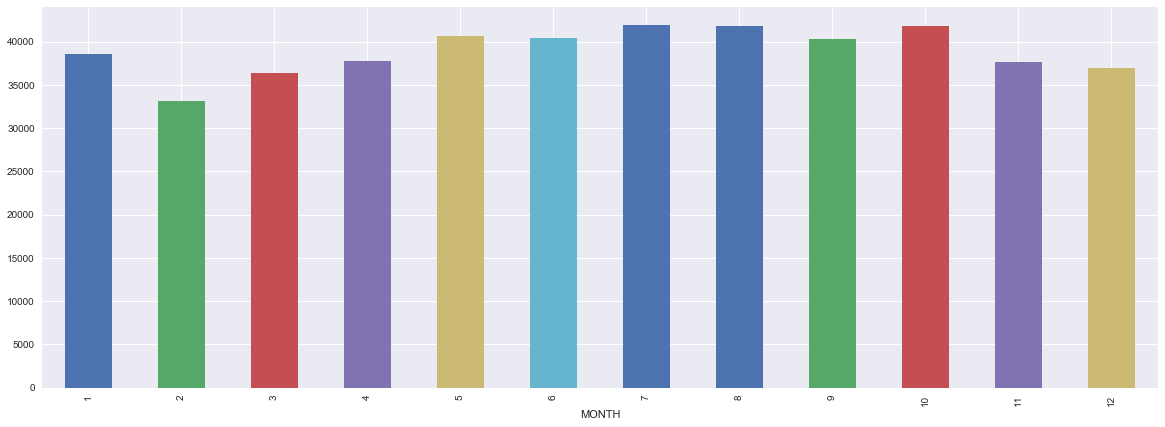

In [104]:
# Another way to show the plot
fig, ax = plt.subplots(figsize=(20,7))
crime_month.plot.bar()

3- By Borough

In [156]:
# Top 5 crime type and the borough in which that type happened the most
crime_borough=df_NY.groupby(['BORO_NM','PD_DESC']).size().nlargest()
print(crime_borough)

BORO_NM    PD_DESC                       
BROOKLYN   HARASSMENT,SUBD 3,4,5             14789
MANHATTAN  LARCENY,PETIT FROM STORE-SHOPL    12381
BROOKLYN   ASSAULT 3                         11905
BRONX      HARASSMENT,SUBD 3,4,5             10805
           ASSAULT 3                         10505
dtype: int64


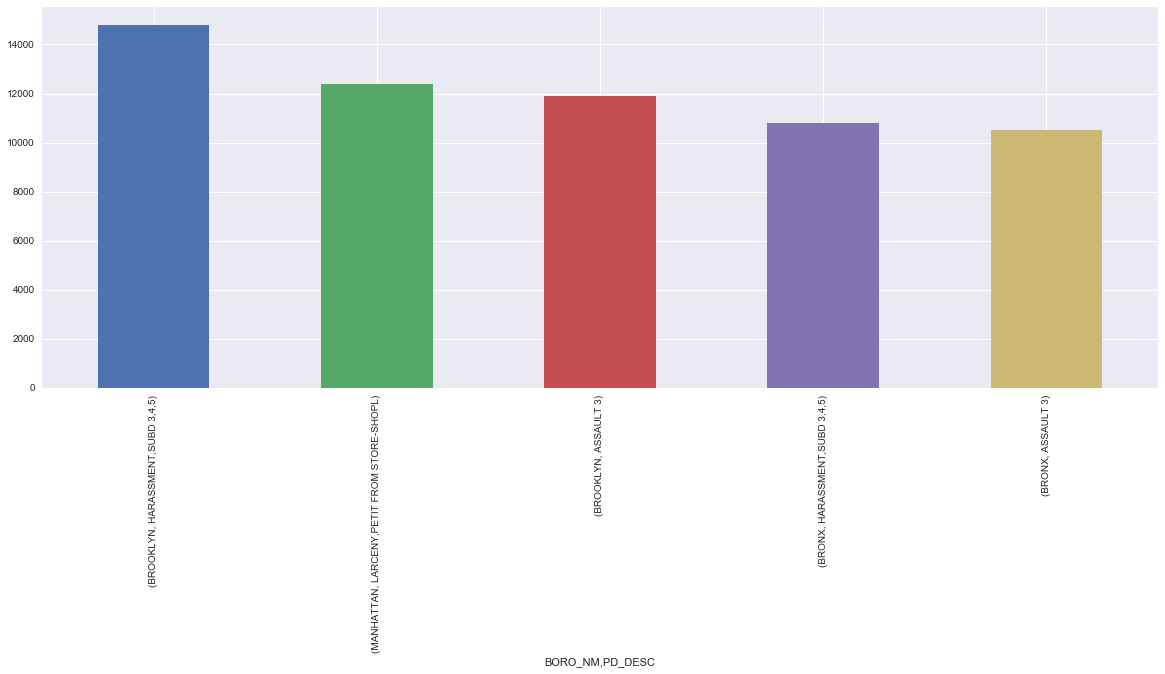

In [158]:
fig, ax = plt.subplots(figsize=(20,7))
crime_borough.plot.bar()

Frequency Distribution:
BROOKLYN         137283
MANHATTAN        114104
BRONX            103218
QUEENS            91367
STATEN ISLAND     21262
Name: BORO_NM, dtype: int64


[Text(0,0,'BROOKLYN'),
 Text(0,0,'MANHATTAN'),
 Text(0,0,'BRONX'),
 Text(0,0,'QUEENS'),
 Text(0,0,'STATEN ISLAND')]

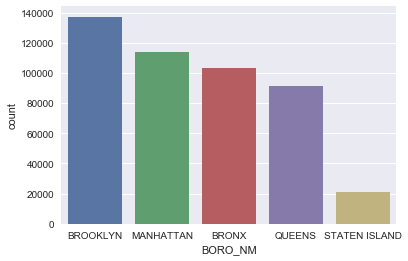

In [82]:
#NY City borough with most crimes (from 2015-2017)
NY_borough = df_NY['BORO_NM'].value_counts()
print('Frequency Distribution:', NY_borough[:10], sep='\n')
%matplotlib inline
g_NY_district=seaborn.countplot(x='BORO_NM', data=df_NY,order=df_NY['BORO_NM'].value_counts().iloc[:10].index)
g_NY_district.set_xticklabels(g_NY_district.get_xticklabels())

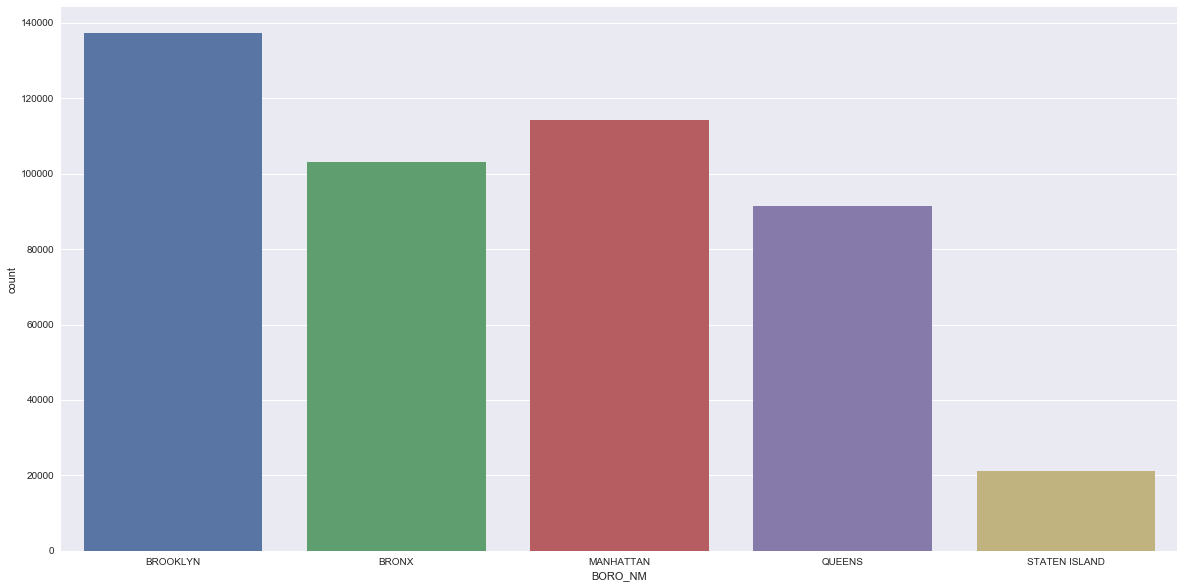

In [85]:
#Another way to show the plot
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,1,1)
sns.set(style="darkgrid") #choose a style u like
ax = sns.countplot(x="BORO_NM",  data=df_NY)

4- By Primary Type

In [40]:
#New York Crime Distribution
primary_type=df_NY['PD_DESC'].value_counts()
print('Frequency Distribution:', primary_type[:10], sep='\n')

Frequency Distribution:
HARASSMENT,SUBD 3,4,5               47801
ASSAULT 3                           41636
LARCENY,PETIT FROM STORE-SHOPL      29010
AGGRAVATED HARASSMENT 2             20277
LARCENY,PETIT FROM BUILDING,UN      18934
HARASSMENT,SUBD 1,CIVILIAN          18544
ASSAULT 2,1,UNCLASSIFIED            15624
MISCHIEF, CRIMINAL 4, OF MOTOR      14745
CRIMINAL MISCHIEF,UNCLASSIFIED 4    12666
LARCENY,PETIT FROM AUTO             12470
Name: PD_DESC, dtype: int64


[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

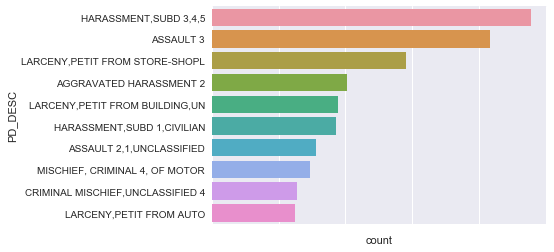

In [113]:
%matplotlib inline
g_NY=seaborn.countplot(y='PD_DESC', data=df_NY,order=df_NY['PD_DESC'].value_counts().iloc[:10].index)
g_NY.set_xticklabels(g_NY.get_xticklabels(),rotation=90)

5- By law

In [154]:
#Crime count by Boroughs under each Law Category

crime_by_law_cat=df_NY.groupby(['LAW_CAT_CD', 'BORO_NM']).size()
print(crime_by_law_cat)

LAW_CAT_CD   BORO_NM      
FELONY       BRONX            28616
             BROOKLYN         43968
             MANHATTAN        35178
             QUEENS           29247
             STATEN ISLAND     4747
MISDEMEANOR  BRONX            59251
             BROOKLYN         73563
             MANHATTAN        65697
             QUEENS           47874
             STATEN ISLAND    11896
VIOLATION    BRONX            15351
             BROOKLYN         19752
             MANHATTAN        13229
             QUEENS           14246
             STATEN ISLAND     4619
dtype: int64


In [152]:
#law categories overall count

crime_by_law_cat_largest=df_NY.groupby(['LAW_CAT_CD']).size().nlargest(3)
print(crime_by_immediate_location_largest)

LAW_CAT_CD
MISDEMEANOR    258281
FELONY         141756
VIOLATION       67197
dtype: int64


[Text(0,0,'MISDEMEANOR'), Text(0,0,'FELONY'), Text(0,0,'VIOLATION')]

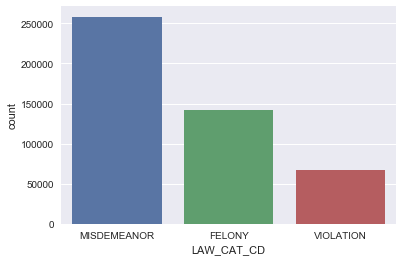

In [151]:
#Visual Representation of the Severity of crimes committed on total
%matplotlib inline
g_NY_district=seaborn.countplot(x='LAW_CAT_CD', data=df_NY,order=df_NY['LAW_CAT_CD'].value_counts().iloc[:3].index)
g_NY_district.set_xticklabels(g_NY_district.get_xticklabels())

In [10]:
tab = pd.crosstab(data_NY.BORO_NM, data_NY.PREM_TYP_DESC) #margins:includes row and column totals

tab.head()

PREM_TYP_DESC,ABANDONED BUILDING,AIRPORT TERMINAL,ATM,BANK,BAR/NIGHT CLUB,BEAUTY & NAIL SALON,BOOK/CARD,BRIDGE,BUS (NYC TRANSIT),BUS (OTHER),...,TAXI (LIVERY LICENSED),TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TELECOMM. STORE,TRAMWAY,TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),TUNNEL,VARIETY STORE,VIDEO STORE
BORO_NM,,,,,,,,,,,,,,,,,,,,,
BRONX,30,4,116,415,358,262,7,58,353,41,...,145,57,9,144,3,1904,65,40,141,7
BROOKLYN,84,3,108,444,977,460,14,126,275,61,...,170,113,26,219,2,2948,70,57,225,18
MANHATTAN,100,1,148,858,2597,391,168,137,213,69,...,157,294,19,363,3,5962,162,54,141,43
QUEENS,50,1208,55,412,935,239,10,221,193,43,...,74,53,16,206,3,1146,63,92,110,17
STATEN ISLAND,36,0,12,49,89,58,4,27,78,22,...,13,3,0,17,0,0,48,6,23,2


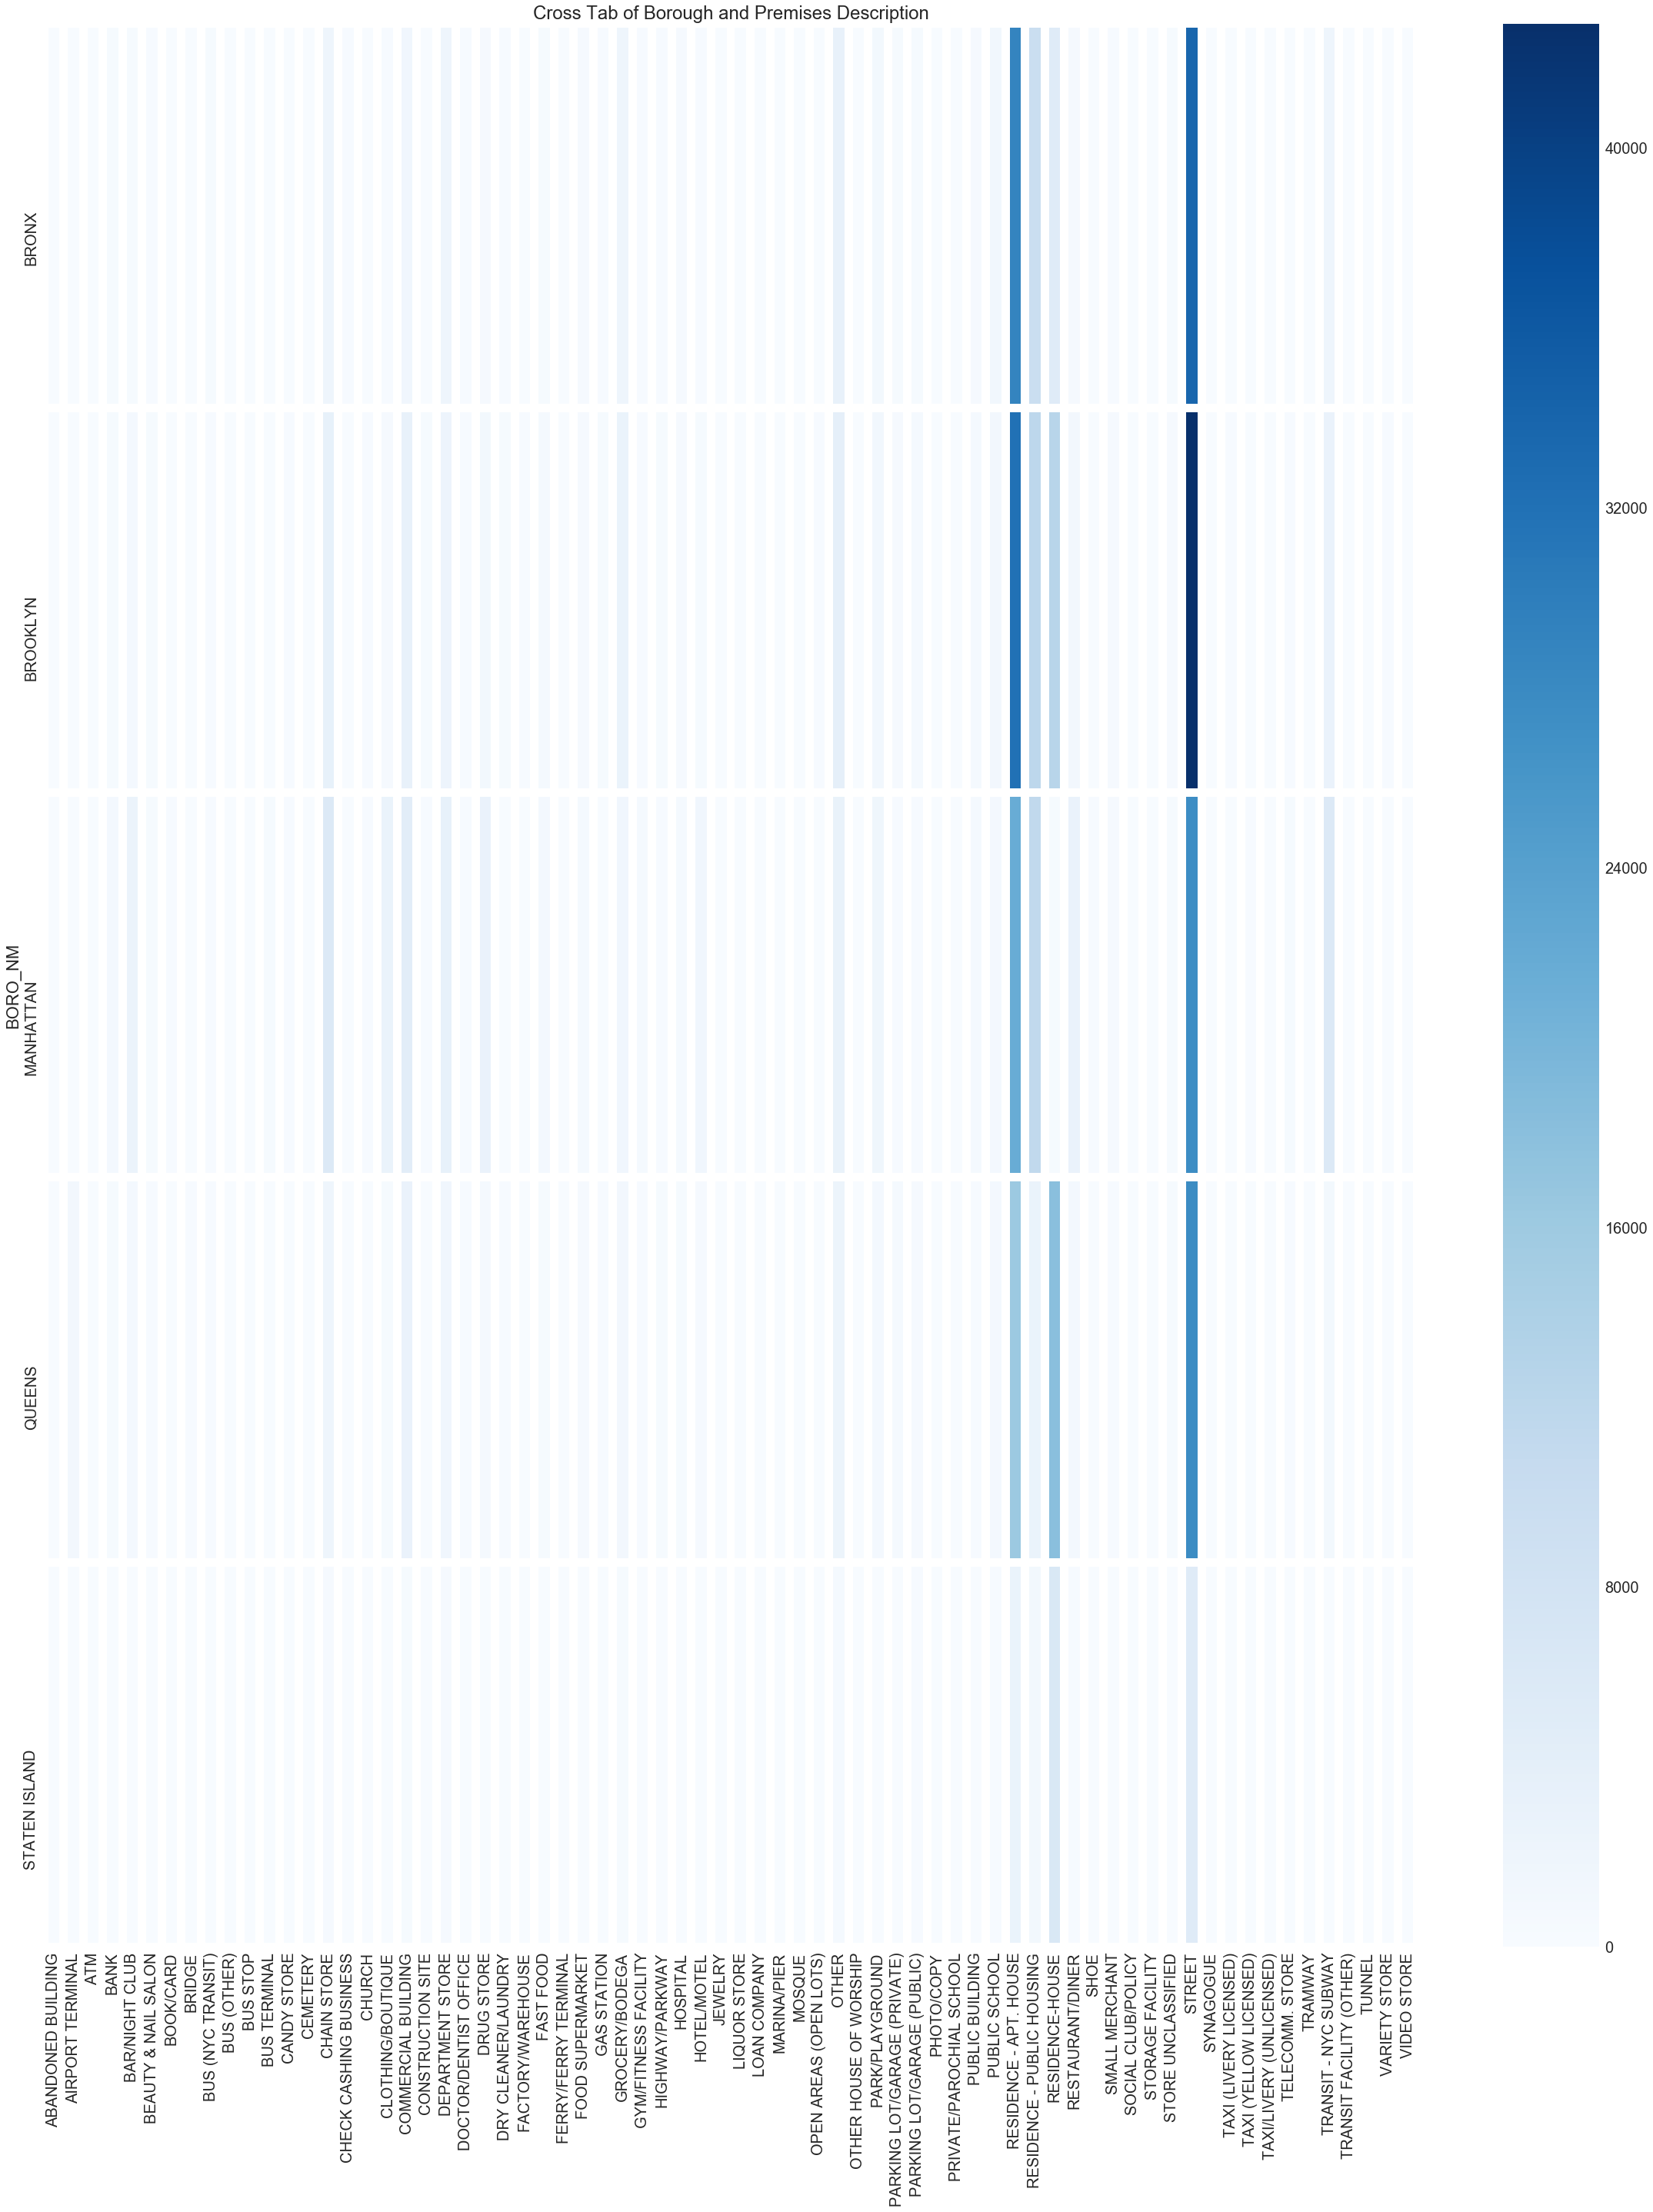

In [9]:
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt


DF=pd.DataFrame(tab, columns=['ABANDONED BUILDING', 'AIRPORT TERMINAL', 'ATM', 'BANK',
       'BAR/NIGHT CLUB', 'BEAUTY & NAIL SALON', 'BOOK/CARD', 'BRIDGE',
       'BUS (NYC TRANSIT)', 'BUS (OTHER)', 'BUS STOP', 'BUS TERMINAL',
       'CANDY STORE', 'CEMETERY', 'CHAIN STORE', 'CHECK CASHING BUSINESS',
       'CHURCH', 'CLOTHING/BOUTIQUE', 'COMMERCIAL BUILDING',
       'CONSTRUCTION SITE', 'DEPARTMENT STORE', 'DOCTOR/DENTIST OFFICE',
       'DRUG STORE', 'DRY CLEANER/LAUNDRY', 'FACTORY/WAREHOUSE', 'FAST FOOD',
       'FERRY/FERRY TERMINAL', 'FOOD SUPERMARKET', 'GAS STATION',
       'GROCERY/BODEGA', 'GYM/FITNESS FACILITY', 'HIGHWAY/PARKWAY', 'HOSPITAL',
       'HOTEL/MOTEL', 'JEWELRY', 'LIQUOR STORE', 'LOAN COMPANY', 'MARINA/PIER',
       'MOSQUE', 'OPEN AREAS (OPEN LOTS)', 'OTHER', 'OTHER HOUSE OF WORSHIP',
       'PARK/PLAYGROUND', 'PARKING LOT/GARAGE (PRIVATE)',
       'PARKING LOT/GARAGE (PUBLIC)', 'PHOTO/COPY', 'PRIVATE/PAROCHIAL SCHOOL',
       'PUBLIC BUILDING', 'PUBLIC SCHOOL', 'RESIDENCE - APT. HOUSE',
       'RESIDENCE - PUBLIC HOUSING', 'RESIDENCE-HOUSE', 'RESTAURANT/DINER',
       'SHOE', 'SMALL MERCHANT', 'SOCIAL CLUB/POLICY', 'STORAGE FACILITY',
       'STORE UNCLASSIFIED', 'STREET', 'SYNAGOGUE', 'TAXI (LIVERY LICENSED)',
       'TAXI (YELLOW LICENSED)', 'TAXI/LIVERY (UNLICENSED)', 'TELECOMM. STORE',
       'TRAMWAY', 'TRANSIT - NYC SUBWAY', 'TRANSIT FACILITY (OTHER)', 'TUNNEL',
       'VARIETY STORE', 'VIDEO STORE'])

sns.set(font_scale=2)
plt.figure(figsize=(40, 46))
plt.xticks(rotation=90)

ax = plt.axes()
ax.set_title('Cross Tab of Borough and Premises Description')

p2=sns.heatmap(DF,annot=False,linewidths=10,cmap='Blues')

#output_file("Prem type.html")

p2


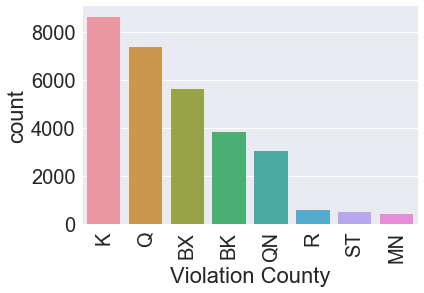